## ChEMBL nAChR alpha7 PROJECT

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy 
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
df = pd.read_csv('DOWNLOAD-Kb_eBIoh-BB6pynHFEgBscqnHMHgmJpAsNkp_TDw4Rc=.csv',sep=';')
df.head(2)

Molecule ChEMBL ID Molecule Name  Molecule Max Phase  Molecular Weight  \
0      CHEMBL4782049           NaN                   0            264.28   
1      CHEMBL4790023           NaN                   0            264.28   

  #RO5 Violations AlogP Compound Key  \
0               0  1.83     (S,S)-2c   
1               0  1.83     (S,R)-2c   

                                          Smiles Standard Type  \
0   CN1CCC[C@H]1[C@H]1COc2c(cccc2[N+](=O)[O-])O1            Ki   
1  CN1CCC[C@H]1[C@@H]1COc2c(cccc2[N+](=O)[O-])O1            Ki   

  Standard Relation  ...                                        Target Name  \
0               NaN  ...  Neuronal acetylcholine receptor protein alpha-...   
1               NaN  ...  Neuronal acetylcholine receptor protein alpha-...   

     Target Organism     Target Type Document ChEMBL ID Source ID  \
0  Rattus norvegicus  SINGLE PROTEIN      CHEMBL4673370         1   
1  Rattus norvegicus  SINGLE PROTEIN      CHEMBL4673370         1   

      Source Description  Document Journal Document Year Cell ChEMBL ID  \
0  Scientific Literature        J Med Chem          2020           None   
1  Scientific Literature        J Med Chem          2020           None   

          Properties  
0  TIME = 0.08333 hr  
1  TIME = 0.08333 hr  

[2 rows x 45 columns]

In [3]:
df1 = df.copy()[(df['Standard Relation'] == "'='") & (df['Standard Type'] == 'Ki') & (df['Target Organism'] == 'Homo sapiens') & (df['Assay Organism'] == 'Homo sapiens')]
df1 = df1.reset_index(drop = True)

df1.shape

(542, 45)

In [4]:
def clean_smi (smi):
    from rdkit import Chem
    mol = Chem.CanonSmiles(smi) # canonicalize smiles
    smi_mol = mol.split('.')[0] # Exclude salt
    return smi_mol    

def stereo_check (smi):
    from rdkit import Chem
    from rdkit.Chem import AllChem
    from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions
        
    mol = Chem.MolFromSmiles(smi)
    opt = StereoEnumerationOptions(tryEmbedding = True, unique=True) #tryEmbedding --> try to construct the isomer
                                                                    # unique --> two smiles can form the same isomer
                                                                    # By default the code only expands unspecified stereocenters
    isomers = len(tuple(EnumerateStereoisomers(mol, options = opt))) > 1

    if isomers:
        return None
    else:
        return smi  
    
    # code to verify the number of chiral centers, but it can not be sufficient to treat with bicyclic compounds
    """
    stereocenters = len(AllChem.FindMolChiralCenters(mol, includeUnassigned=True,
                                                     includeCIP=False, # no include the R,S configuration
                                                     useLegacyImplementation=False))

    
    #print(f'The known stereogenic centers are {k_stereocenter} and the identified are {stereocenters}')

    if k_stereocenter != stereocenters:
        return None
    else:
        return smi                                                  
    """  
    
   

In [5]:
df1['Smiles'].sample(10)

205    OC/C=C1/CN2CC[C@H]3[C@@H]2C[C@@H]1/C1=C/N2c4cc...
296                  CN1C[C@@H]2C[C@H](C1)C1CCCC(=O)N1C2
12     COc1ccc2oc(C(=O)N[C@@H]3C4CCN(CC4)[C@H]3Cc3ccc...
134    O=C(O[C@@H]1C[C@@H]2CC[C@H](C1)N2CCc1cccc(O)c1...
310                 O=C(NC1CN2CCC1CC2)c1cc(-c2ccccc2)sn1
281    Cc1ccc2oc(C(=O)N[C@@H]3C4CCN(CC4)[C@H]3Cc3cccn...
196          C[N+]1(C)C2CCC1CC(OC1c3ccccc3CCc3ccccc31)C2
175                                 CN1CCC[C@H]1c1cccnc1
106    C/C=C/C[N+]12CC[C@H]3[C@@H]1C[C@H]1C(=CCO[C@@H...
524                                 CN1CCC[C@H]1c1cccnc1
Name: Smiles, dtype: object

In [6]:
# Sample = df1['Smiles'].sample(1)
# display(Sample)
# Sample.apply(clean_smi).apply(stereo_check)


In [ ]:
df1['Smiles'] = df1['Smiles'].apply(clean_smi).apply(stereo_check)

In [ ]:
df_stereo = df1.dropna(axis=0,subset=['Smiles']).reset_index(drop=True)


In [273]:
df_stereo = df_stereo.sort_values(by='pChEMBL Value', 
                ascending = False).drop_duplicates(subset= ['Molecule ChEMBL ID','Smiles'],
                                                   keep='first')
df_stereo

Molecule ChEMBL ID Molecule Name  Molecule Max Phase  Molecular Weight  \
1378      CHEMBL1083281           NaN                   0            408.29   
1140      CHEMBL3235498           NaN                   0            399.53   
1070      CHEMBL1950156           NaN                   0            400.53   
1382      CHEMBL1086480           NaN                   0            304.40   
1676       CHEMBL496851           NaN                   0            491.62   
...                 ...           ...                 ...               ...   
1568      CHEMBL3578315           NaN                   0            174.25   
1574      CHEMBL2441751           NaN                   0            158.20   
1660      CHEMBL3318015           NaN                   0            364.45   
1863      CHEMBL2381569           NaN                   0            264.28   
1884      CHEMBL3318016           NaN                   0            363.47   

     #RO5 Violations AlogP   Compound Key  \
1378               0  2.18    (1S,4S)-10c   
1140               0  2.40  [11C]A-752274   
1070               0  2.40             37   
1382               0  3.12            18e   
1676               0  2.62             46   
...              ...   ...            ...   
1568               0  1.77          (R)-4   
1574               0  0.00          (R)-1   
1660               0  2.51             15   
1863               0  1.85              2   
1884               0  3.12             16   

                                                 Smiles Standard Type  \
1378     C[N+]1(C)C[C@@H]2C[C@H]1CN2c1ccc(-c2ccccc2)nn1            Ki   
1140  CN1C[C@H]2CN(c3ccc4c(c3)C(=O)c3cc(N5C[C@@H]6CN...            Ki   
1070  CN1C[C@H]2CN(c3ccc4c(c3)C(=O)c3cc(N5C[C@@H]6CN...            Ki   
1382   CN1C[C@@H]2C[C@H]1CN2c1ccc(-c2ccc3[nH]ccc3c2)cn1            Ki   
1676  CN1C[C@H]2CN(c3ccc(-c4ccc5[nH]ccc5c4)nn3)C[C@H...            Ki   
...                                                 ...           ...   
1568                          c1cc2c(cn1)[C@H]1CCCN1CC2            Ki   
1574                          CN(C)C[C@@H]1CN(C)C(=O)O1            Ki   
1660          c1cncc(-c2ccc(-c3nnnn3CCCCN3CCOCC3)cc2)c1            Ki   
1863          CN1CCC[C@H]1COC(=O)c1cccc([N+](=O)[O-])c1            Ki   
1884          c1ccc(-c2ccc(-c3nnnn3CCCCN3CCOCC3)cc2)cc1            Ki   

     Standard Relation  ...  \
1378               '='  ...   
1140               '='  ...   
1070               '='  ...   
1382               '='  ...   
1676               '='  ...   
...                ...  ...   
1568               '='  ...   
1574               '='  ...   
1660               '='  ...   
1863               '='  ...   
1884               '='  ...   

                                            Target Name    Target Organism  \
1378  Neuronal acetylcholine receptor protein alpha-...  Rattus norvegicus   
1140  Neuronal acetylcholine receptor protein alpha-...       Homo sapiens   
1070  Neuronal acetylcholine receptor protein alpha-...  Rattus norvegicus   
1382  Neuronal acetylcholine receptor protein alpha-...  Rattus norvegicus   
1676  Neuronal acetylcholine receptor protein alpha-...  Rattus norvegicus   
...                                                 ...                ...   
1568  Neuronal acetylcholine receptor protein alpha-...  Rattus norvegicus   
1574  Neuronal acetylcholine receptor protein alpha-...  Rattus norvegicus   
1660  Neuronal acetylcholine receptor protein alpha-...  Rattus norvegicus   
1863  Neuronal acetylcholine receptor protein alpha-...       Homo sapiens   
1884  Neuronal acetylcholine receptor protein alpha-...  Rattus norvegicus   

         Target Type Document ChEMBL ID Source ID     Source Description  \
1378  SINGLE PROTEIN      CHEMBL1155544         1  Scientific Literature   
1140  SINGLE PROTEIN      CHEMBL3232832         1  Scientific Literature   
1070  SINGLE PROTEIN      CHEMBL1949494         1  Scientific Literature   
1382  SINGLE PROTEIN    

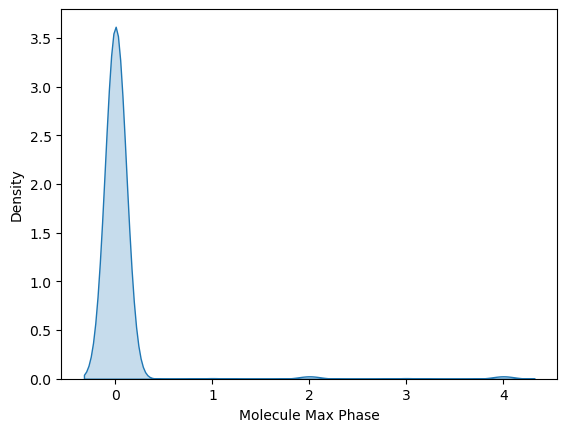

In [275]:
sns.kdeplot(data = df_stereo['Molecule Max Phase'],fill= True)
plt.show()

Obs: Es posible identificar que hay una gran cantidad de moléculas evaluadas que no llegan a los ensayos clinicos

In [230]:
df_stereo.columns

Index(['index', 'Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties'],
      dtype='object')

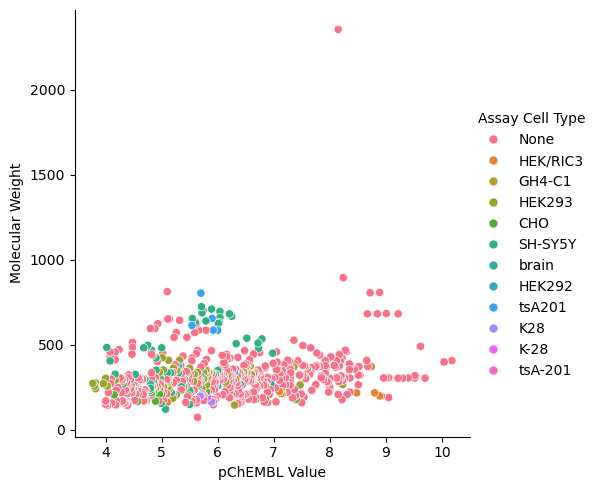

In [264]:

sns.relplot(data= df_stereo[['Molecule Max Phase', 'Molecular Weight', '#RO5 Violations', 'AlogP',
                      'pChEMBL Value',
                      'Ligand Efficiency BEI', 'Ligand Efficiency LE','Ligand Efficiency LLE',
                      'Ligand Efficiency SEI',
                      'Assay Cell Type']],
            y='Molecular Weight', x='pChEMBL Value', hue = 'Assay Cell Type'
                                                    )
plt.show()


In [265]:

np.unique(df_stereo['Assay Cell Type'], return_counts= True)

(array(['CHO', 'GH4-C1', 'HEK/RIC3', 'HEK292', 'HEK293', 'K-28', 'K28',
        'None', 'SH-SY5Y', 'brain', 'tsA-201', 'tsA201'], dtype=object),
 array([ 17,   8,   9,   2,  64,   1,   2, 421,  51,   5,   2,   7],
       dtype=int64))

In [219]:
np.unique(df_stereo['Assay ChEMBL ID'], return_counts= True )


(array(['CHEMBL1261017', 'CHEMBL1832420', 'CHEMBL1948415', 'CHEMBL2148894',
        'CHEMBL2184685', 'CHEMBL2187476', 'CHEMBL2188607', 'CHEMBL2343657',
        'CHEMBL2343658', 'CHEMBL2383618', 'CHEMBL2410352', 'CHEMBL2445786',
        'CHEMBL3135741', 'CHEMBL3223765', 'CHEMBL3238714', 'CHEMBL3238803',
        'CHEMBL3365235', 'CHEMBL3761531', 'CHEMBL4034218', 'CHEMBL4256522',
        'CHEMBL4265353', 'CHEMBL4337213', 'CHEMBL4770643', 'CHEMBL871846',
        'CHEMBL884741', 'CHEMBL885367', 'CHEMBL896283', 'CHEMBL896284',
        'CHEMBL905460'], dtype=object),
 array([ 4,  4,  8,  2, 10,  9,  1,  1,  1,  8,  7,  2,  2,  2,  1,  2,  1,
         1,  1,  3, 15,  1,  4,  2,  1,  2,  3,  4,  7], dtype=int64))

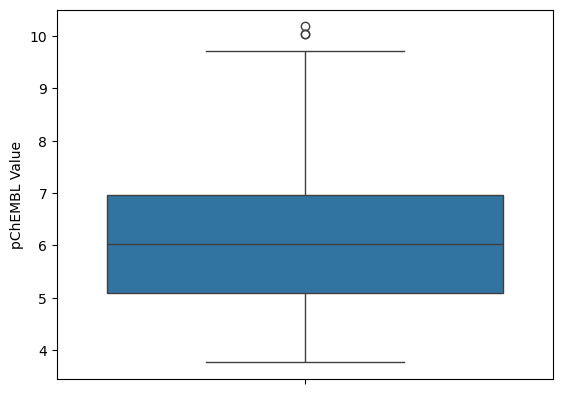

In [266]:
sns.boxplot(data = df_stereo, y='pChEMBL Value')
plt.show()